# Capítulo 2. Projeto de aprendizado de máquina de ponta a ponta

In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Carregando os dados, lendo e criando um repositório 

Com objetivo de carregar os dados de forma elegante, vamos fazer uma simples função, com objetivo de carregar os dados e criar um repositório. Para tal, inicialmente vamos definir a origem dos dados e o nome do repositório,

In [2]:
import os
import tarfile
import urllib

In [3]:
# loading the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [4]:
def fetch_housing_data(housing_url, housing_path, data):
    '''
    Creates `HOUSING_PATH`, Downloads & Extracts the contents of `HOUSING_URL` into `HOUSING_PATH`
    
    Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    '''   
        
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, data)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

Com a função criada, basta carregala e escolher os parametros,


In [5]:
def load_housing_data(housing_path, data):
    '''
    Loads Housing data into a pandas dataframe.
    
    Arguments:
        housing_path: the path where `housing.csv` exists
    
    Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    '''
    
    csv_path = os.path.join(housing_path, data)
    return pd.read_csv(csv_path)

In [6]:
# creating directory
fetch_housing_data(housing_url=HOUSING_URL,
                   housing_path=HOUSING_PATH,
                   data="housing.tgz")

Agora, com os dados já carregados, precisamos lelos, para isso, novamente vamos fazer uma função, 'load_housing_data', que novamente será carregada do arquivo 'info_apoio.py'. Desata forma, podemos definir o objeto 'housing', que nada mais é do que um DataFrame da biblioteca 'pandas'.
          

In [7]:
# reading the data
housing = load_housing_data(housing_path=HOUSING_PATH,
                            data="housing.csv")

housing.head(10)   # first 10 lines

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


É facil observar que temos apenas uma coluna de dados 'não numericos', mas para analisarmos valores faltantes, fica inviaval analisar o DataFrame. Para tal tarefa vamos usar o método 'info()',

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Assim fica claro que:
- 1 coluna tem dados faltantes - 'total_bedrooms'
- 1 coluna de dados categoricos - 'ocean_proximity'

Vamos analisar a coluna 'ocean_proximity', primeiramente usaremos o método value_counts(),

In [9]:
housing['ocean_proximity'].value_counts() # grouping equal values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Usando histogramas para analisar os dados numericos,

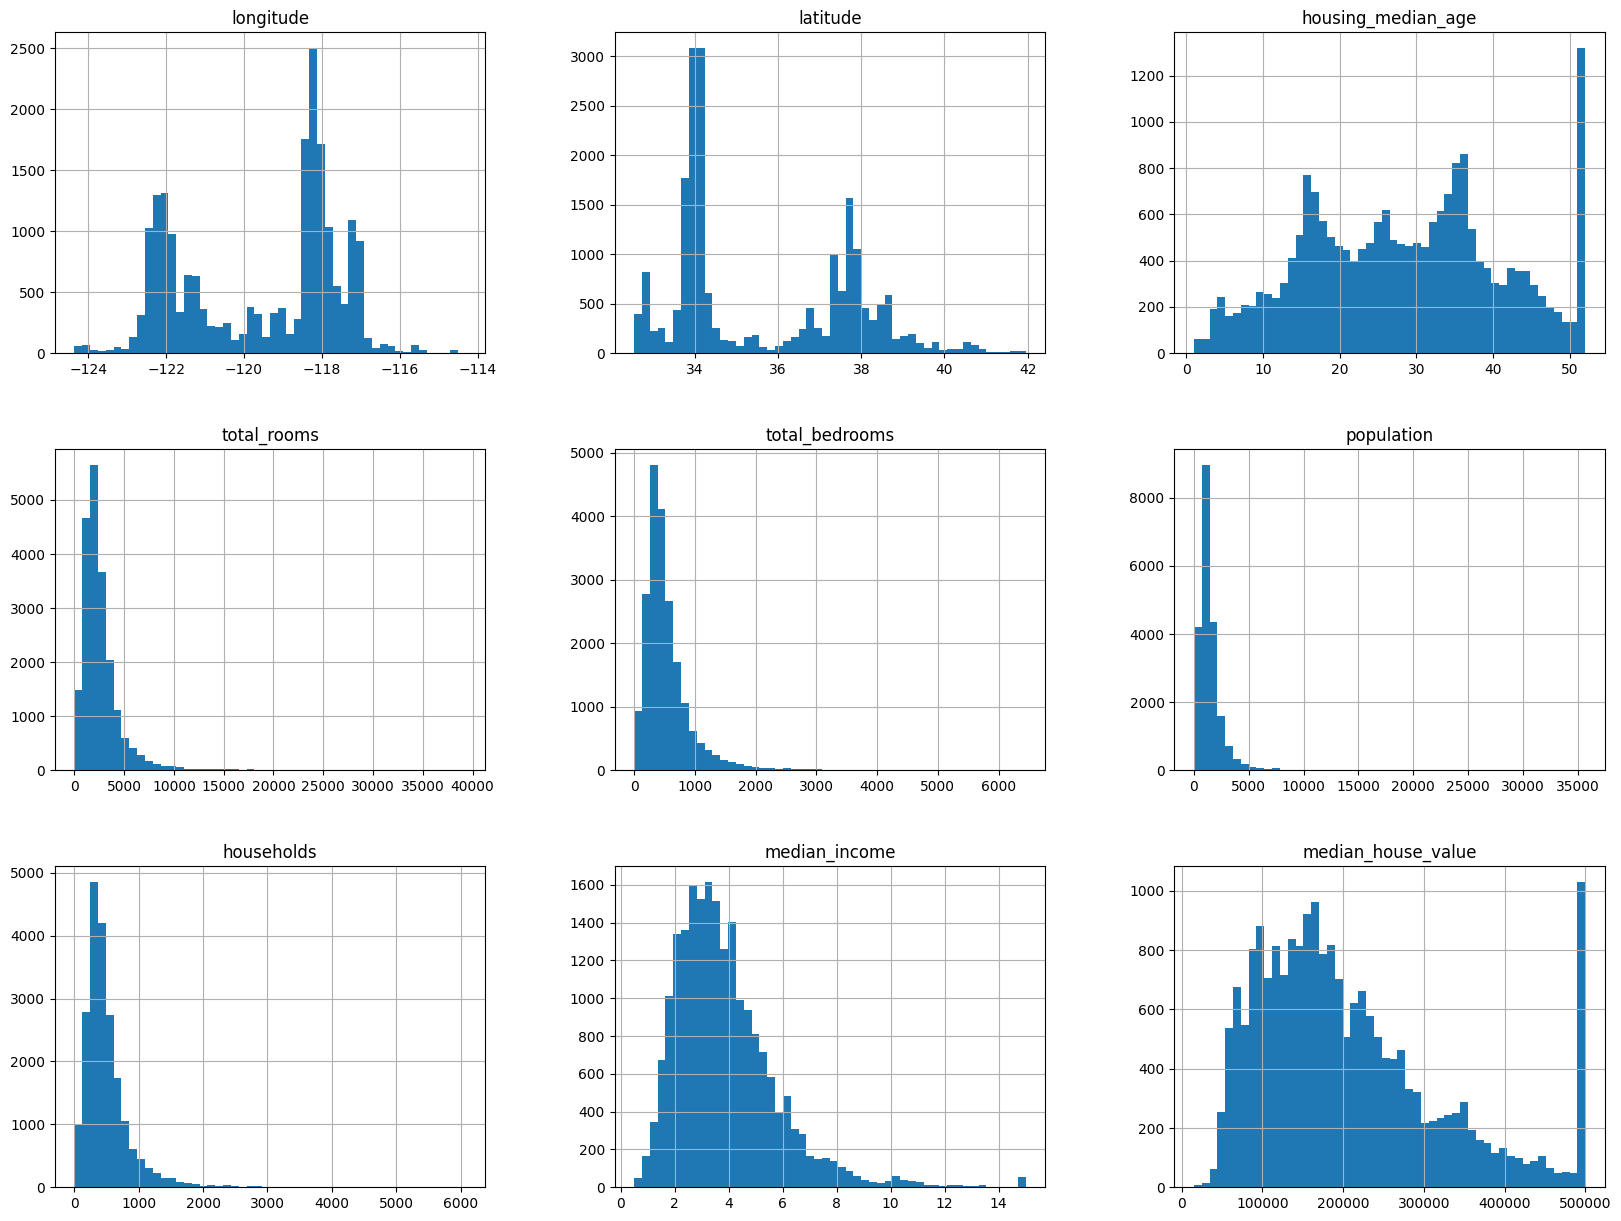

In [11]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Criando um conjunto de dados de teste

In [12]:
def split_train_test(data, test_ratio):   
    '''
    Splits a dataset into train/test using a `test_ratio`.
    
    Arguments:
        data, pd.DataFrame: the whole dataset.
        test_ratio, float: the percentage taken from the original dataset as a test set.
    
    Returns:
        train, pd.DataFrame: the training set.
        test, pd.DataFrame: the test set.
    '''    
    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

Usando a função split_train_test(), vamos criar um conjunto de dados de teste, com 20% do conjunto dos dados originais,

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

print(' \n train_set: {} \n test_set: {} \n fraction: {:.2f}'.format(len(train_set), len(test_set), len(test_set)/len(housing)))

 
 train_set: 16512 
 test_set: 4128 
 fraction: 0.20


Supondo que 'median_income' é o atributo mais importante, é interessante separalo em categorias,

In [14]:
from zlib import crc32


In [15]:
def test_set_check(identifier, test_ratio=.2):
    '''
    Checks if an instance with `identifier` should be in the test set of overall ratio `test_ratio`
    
    Arguments:
        identifier, int: the instance/row identifier (ex. row index from `pd.DataFrame`)
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
    
    Returns:
        in_test, bool: True if instance should be in the test set, False otherwise.
    
    Notes:
        - The CRC32 function converts a varibale-length string into an 8-character string that 
        is a text representation of the hexadecimal value of a 32bit binary sequence.
    '''
    
    total_size = 2**32
    hex_repr = crc32(np.int64(identifier)) & 0xffffffff
    in_test = hex_repr < (test_ratio * total_size)
    return in_test

In [16]:
[test_set_check(i) for i in range(10)]


[False, False, True, False, False, True, False, False, False, False]

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    '''
    Splits a dataframe using hash-based identification
    
    Arguments:
        data, pd.DataFrame: the dataframe comprised of an id column and data of interest.
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
        id_column, string: column name with identifiers for each row.
    
    Returns:
        train, pd.DataFrame: the train set.
        test, pd.DataFrame: the test set.
    '''
    
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()


In [19]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column="index")
train_set.shape, test_set.shape

((16512, 11), (4128, 11))

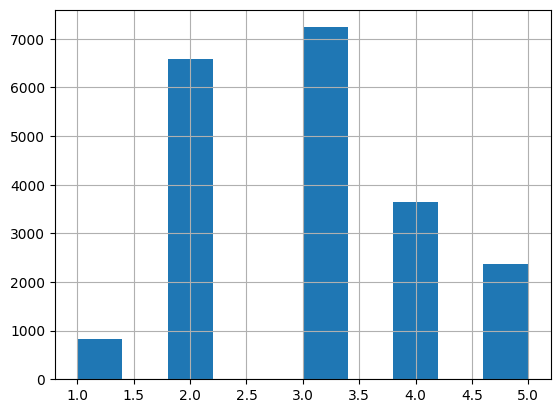

In [20]:
housing['income_cat'] = pd.cut(housing['median_income'],
                        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])

housing['income_cat'].hist()

plt.show()

Agora, podemos criar uma base de teste 'baseada' em 'income_cat', de forma a representar os dados de forma 'mais original',

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [23]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Repare que a diferença dos dados de teste para os dados originais estão apenas na terceira casa decimal.

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# Visualizando dados geográficos

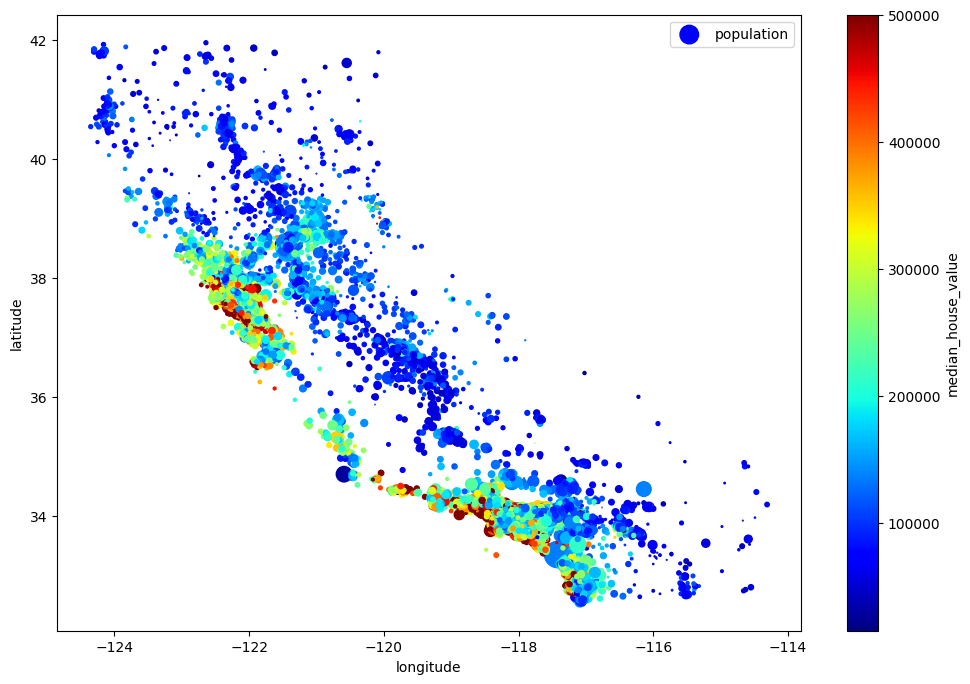

In [25]:
housing = strat_train_set.copy()

housing.plot(kind='scatter', x='longitude', y='latitude',
             s=housing['population']/100,
             label='population',
             figsize=(12, 8),
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True
             )

plt.show()


In [26]:
housing[['population', 'median_house_value']].corr()


,population,median_house_value
population,1.000000,-0.026882
median_house_value,-0.026882,1.000000


# Buscando correlações

In [27]:
corr_matrix = housing.corr()
corr_matrix

C:\Users\leand\AppData\Local\Temp\ipykernel_496\1253314489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [28]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

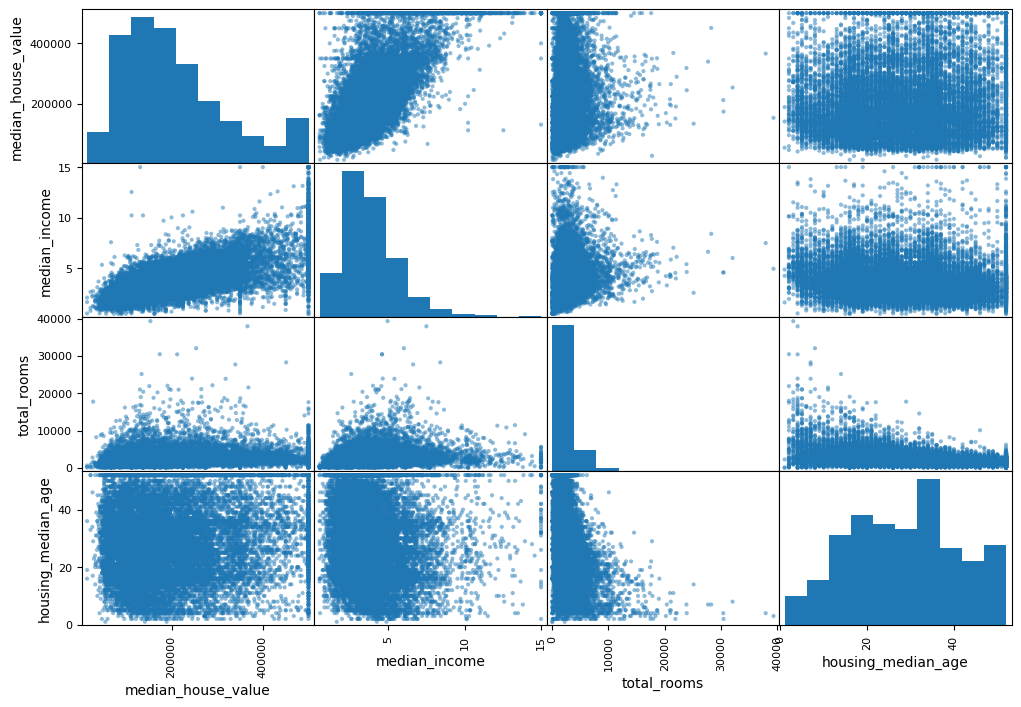

In [29]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


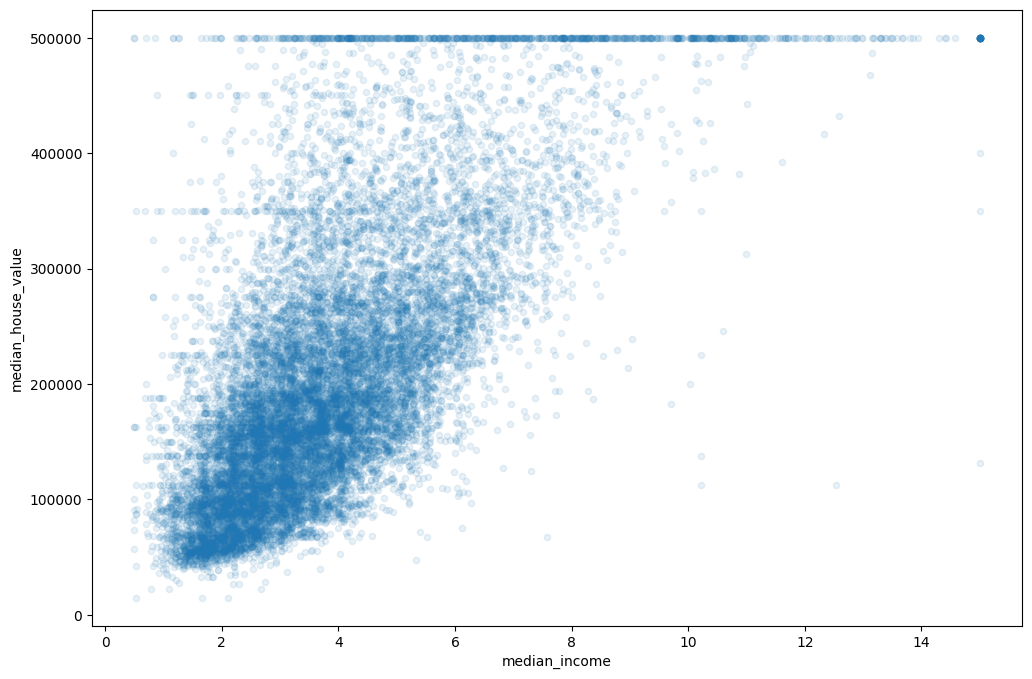

In [30]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(12, 8))

plt.show()

# Testando combinações de correlações

Uma última coisa que gostaríamos de fazer antes de alimentar os dados em um algoritmo de ML é tentar combinar recursos. Exemplos:
- O número de cômodos por domicílio, não o número total de cômodos em um distrito.
- O número total de quartos também não ajuda, queremos compará-lo com o número de quartos.
- O número de pessoas por família também é uma característica interessante de se observar.

Vamos criar todos eles:

In [31]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [32]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\leand\AppData\Local\Temp\ipykernel_496\2905470689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Preparando os dados

Em vez de fazer isso manualmente, devemos escrever funções para esse fim. Mencionamos os seguintes motivos:

- Isso nos permitirá reproduzir as transformações em qualquer novo conjunto de dados.
- Construiremos gradualmente uma biblioteca de transformações que podemos usar em projetos futuros.
- Podemos usar essas funções em nossos sistemas ativos para transformar os dados usando um pipeline antes de alimentá-los no algoritmo.
- Isso nos permitirá experimentar várias transformações ou uma combinação delas para verificar o que funciona melhor.

Vamos começar com um novo conjunto de dados novamente:

In [33]:
# setting data
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
print('\n Dados de treino: {} \n Dados resposta: {}'.format(housing.shape, housing_labels.shape))



 Dados de treino: (16512, 9) 
 Dados resposta: (16512,)


# Limpando os dados

A maioria dos algoritmos de aprendizado de máquina não consegue lidar com recursos ausentes, então vamos criar algumas funções para lidar com eles.

Vimos anteriormente que total_bedroomsfaltam valores, temos 3 opções:

- Livre-se dos distritos correspondentes
- Livre-se de todo o atributo (recurso)
- Defina os valores ausentes para algum valor (zero, média, mediana, regressor preds,...)




In [34]:
housing.drop('total_bedrooms', axis=1)     # 1
median = housing['total_bedrooms']         # 2
housing['total_bedrooms'].fillna(median,   # 3 
                                        inplace=True)

housing.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


Também podemos usar scikit-learn's SimpleImputer:

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
print(imputer.statistics_)

print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [37]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index)

housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


# Manipulando textos e atributos categoricos 

In [38]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [43]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Customizando as Transformações

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
    
    '''Classe responsavel por add atributos'''
            
    def __init__(self, add_badrooms_per_room=True):
        
        self.add_badrooms_per_room = add_badrooms_per_room
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X, y=None):
        
        
        room_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_badrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, room_per_household, population_per_household]
        

In [45]:
attr_adder = CombinedAttributesAdder(add_badrooms_per_room=False)
housung_extra_attribs = attr_adder.transform(housing.values)
housung_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

# Escalonamentos das Caracteristicas

Com poucas exceções, os algoritmos de ML não funcionam bem em recursos de dados com escalas diferentes. No entanto, dimensionar o valor de destino geralmente não é necessário.

Existem duas maneiras de fazer com que todos os recursos tenham a mesma escala:

- Min-Max escala: para cada valor, subtraímos por min e dividimos por (max - min).
- Padronização: Para cada valor, subtraímos a média e dividimos pelo seu desvio padrão.

A padronização produz valores com **média 0 e desvio padrão de 1**. Ao contrário da escala Min-Max, a padronização não limita os valores a um intervalo específico. Isso pode causar problemas para alguns algoritmos de ML (Exemplo: NNs geralmente esperam que as entradas variem de 0 a 1). No entanto, a padronização é muito menos afetada por outliers.

Como acontece com todos os transformadores, **é importante ajustar apenas os dados de treinamento, não o conjunto de dados completo**.

# Transformações de Pipelines

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())])             
                
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

In [47]:
from sklearn.compose import ColumnTransformer


num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
    ])


housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

# Treinando e avaliando o conjunto de treinamento

### Regreção Linear

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)


In [50]:
print('Predictions: {}'.format(lin_reg.predict(some_data_prepared)))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [51]:
print('Labels: {}'.format(list(some_labels)))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [52]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
linrmse = np.sqrt(lin_mse)
print('Mean squared error (linear mode): {}'.format(linrmse))

Mean squared error (linear mode): 68627.87390018745


In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print('Mean squared error (decision mode): {}'.format(tree_rmse))

Mean squared error (decision mode): 0.0


# Validação cruzada

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,
                         housing_prepared,
                         housing_labels,
                         scoring='neg_mean_squared_error',
                         cv=10
                         )

display_scores = np.sqrt(-scores)

In [55]:
scores.mean()

-5088512793.184977

In [56]:
def display_scores(scores):
    print('\n Scores: {} \n Mean: {} \n Standart Derivation: {}'.format(scores, scores.mean(), scores.std()))
    

In [57]:
display_scores(scores)


 Scores: [-5.48179973e+09 -4.94665767e+09 -4.51538200e+09 -5.22541829e+09
 -4.63697728e+09 -5.66265033e+09 -5.03966063e+09 -5.55346593e+09
 -4.82960898e+09 -4.99350709e+09] 
 Mean: -5088512793.184977 
 Standart Derivation: 367445638.4253294


In [58]:
lin_scores = cross_val_score(lin_reg,
                            housing_prepared,
                            housing_labels,
                            scoring='neg_mean_squared_error',
                            cv=10
                            )

lin_rmse_scores = np.sqrt(-lin_scores)

In [59]:
display_scores(lin_rmse_scores)


 Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956] 
 Mean: 69104.07998247063 
 Standart Derivation: 2880.3282098180666


In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

print('Mean squared error (forest mode): {}'.format(forest_rmse))

Mean squared error (forest mode): 18714.89312876215


In [61]:
forest_scores = cross_val_score(forest_reg,
                            housing_prepared,
                            housing_labels,
                            scoring='neg_mean_squared_error',
                            cv=10
                            )

forest_rmse_scores = np.sqrt(-forest_scores)

In [62]:
display_scores(forest_rmse_scores)


 Scores: [51274.2433788  48851.39971603 46420.45528385 52255.93790055
 47557.07363256 52196.0677108  52449.67184134 49762.87574039
 48725.98201481 54071.29058675] 
 Mean: 50356.49978058704 
 Standart Derivation: 2337.1073058697552


### Salvando seu modelo

In [63]:
import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

# Melhorando os parametros 

In [64]:
from sklearn.model_selection import GridSearchCV


In [65]:
# optimizing parameters

parameter_grid = [
    {'n_estimators': [3, 10, 30],
     'max_features': [2, 4, 6, 8]
     },
    {'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 4, 6, 8]
     }
    ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,
                           param_grid=parameter_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [68]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

62982.85834284617 {'max_features': 2, 'n_estimators': 3}
55255.36455488186 {'max_features': 2, 'n_estimators': 10}
53182.293882810234 {'max_features': 2, 'n_estimators': 30}
61007.97716615229 {'max_features': 4, 'n_estimators': 3}
53278.557488736726 {'max_features': 4, 'n_estimators': 10}
50356.99934521548 {'max_features': 4, 'n_estimators': 30}
58852.29615042003 {'max_features': 6, 'n_estimators': 3}
52246.057714553324 {'max_features': 6, 'n_estimators': 10}
50034.46175501296 {'max_features': 6, 'n_estimators': 30}
59561.25078899556 {'max_features': 8, 'n_estimators': 3}
52443.00094608691 {'max_features': 8, 'n_estimators': 10}
50048.71347853238 {'max_features': 8, 'n_estimators': 30}
63298.711324423944 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54143.59160721794 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59433.47252923857 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51365.78192888907 {'bootstrap': False, 'max_features': 4, 'n_estimators'

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
(feature_importances*100).astype(int)

array([ 8,  7,  4,  1,  1,  1,  1, 29,  6, 10,  9,  0, 16,  0,  0,  0])

In [70]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attributes = cat_encoder.categories_[0].tolist()
attributes = num_attribs + extra_attribs + cat_one_hot_attributes

dict(zip(feature_importances, attributes))

{0.08066457085790452: 'longitude',
 0.07294410630003928: 'latitude',
 0.04401902990903451: 'housing_median_age',
 0.016540551189832563: 'total_rooms',
 0.017344000667446617: 'total_bedrooms',
 0.01744940937205719: 'population',
 0.015731312734228568: 'households',
 0.29601981433434044: 'median_income',
 0.06297891419007229: 'rooms_per_hhold',
 0.10539726606439451: 'pop_per_hhold',
 0.09249455072805382: 'bedrooms_per_room',
 0.008149651837374603: '<1H OCEAN',
 0.16422522849016627: 'INLAND',
 8.279351351310272e-05: 'ISLAND',
 0.0020674906106951875: 'NEAR BAY',
 0.0038913092008465698: 'NEAR OCEAN'}

# Avalie seu sistema no conjunto de teste

Depois de ajustar o modelo, podemos avaliar o conjunto de teste. Não há nada de especial nesse processo, reproduzimos as mesmas etapas que você usou com os dados de treinamento para comparar o modelo. A grande diferença é que agora vamos usar o metodo .predict()

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(labels='median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X=X_test)

final_predictions = final_model.predict(X=X_test_prepared)

final_mse = mean_squared_error(y_true=y_test, y_pred=final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

47484.22727824778

É interessante analisar este resultado dentro de um intervalo de confiança,

In [73]:
from scipy import stats

confidence = .95
squared_errors = (y_test - final_predictions) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))
print('Intervalo de confiança: {:.2f} - {:.2f}'.format(confidence_interval[0], confidence_interval[1]))

Intervalo de confiança: 45499.75 - 49389.03
